In [108]:
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector

In [109]:
df = pd.read_csv('cleaned/output_ebayspidercat_2_cleaned.csv')
df.head()

,condition,country,model,sale_date,title,price_pln,producer,model_group,handheld,home_console,generation,seller_name,seller_num_comments,seller_rating,region,condition_num,seller_score,collectible
0,Używany,Stany Zjednoczone,Xbox,2024-12-29,Oryginalny pakiet konsoli Microsoft Xbox z kon...,327.48,Microsoft,Xbox,0,1,6,galvearman.hqncmg46,1078,99.9,AM,1,0.736873,0
1,Używany,Stany Zjednoczone,Xbox,2024-12-29,Oryginalna konsola Microsoft OG Xbox tylko prz...,286.38,Microsoft,Xbox,0,1,6,burrows.anton19,280,100.0,AM,1,0.692709,0
2,Używany,Stany Zjednoczone,Xbox,2024-12-29,Oryginalny pakiet konsoli Microsoft Xbox z gra...,511.71,Microsoft,Xbox,0,1,6,midori.market,107,100.0,AM,1,0.660797,0
3,Używany,Stany Zjednoczone,Xbox,2024-12-29,Oryginalny pakiet konsoli XBOX: (2) kontrolery...,532.18,Microsoft,Xbox,0,1,6,chadmassie,108,100.0,AM,1,0.661105,0
4,Używany,Stany Zjednoczone,Xbox,2024-12-29,Konsola Microsoft Xbox 8GB - czarna (Scarface ...,286.58,Microsoft,Xbox,0,1,6,eg.sixoneseven,67,100.0,AM,1,0.645358,0


In [120]:
"""Ewentualnie zakodować jakoś model_group"""
df_for_corr = df.drop(columns=['model_group','condition','country','model','sale_date','title','producer','seller_name', 'region'])

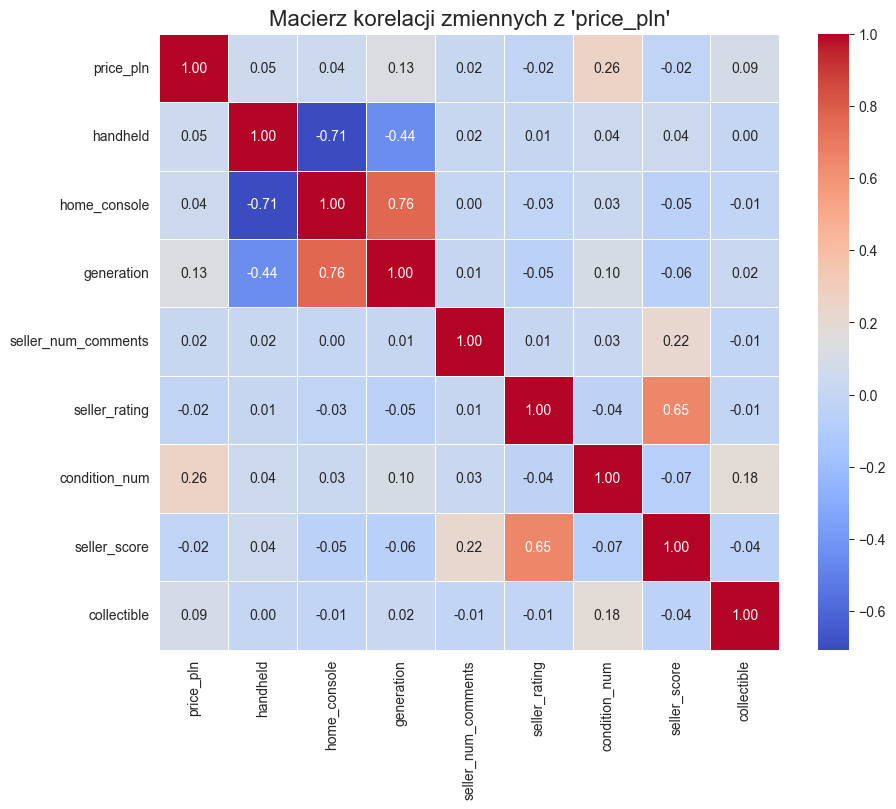

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_for_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)


plt.title("Macierz korelacji zmiennych z 'price_pln'", fontsize=16)
plt.show()

In [112]:
df_for_corr.head()

,price_pln,handheld,home_console,generation,seller_num_comments,seller_rating,condition_num,seller_score,collectible
0,327.48,0,1,6,1078,99.9,1,0.736873,0
1,286.38,0,1,6,280,100.0,1,0.692709,0
2,511.71,0,1,6,107,100.0,1,0.660797,0
3,532.18,0,1,6,108,100.0,1,0.661105,0
4,286.58,0,1,6,67,100.0,1,0.645358,0


In [113]:
y = df_for_corr['price_pln']
X = df_for_corr.drop(columns=['price_pln'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
ln = LinearRegression()
forward = SequentialFeatureSelector(
    ln,
    k_features=4,
    forward=True,
    verbose=1,
    scoring="neg_mean_squared_error"
)
sf_forward = forward.fit(X,y)

Features: 4/4

In [115]:
feat_names = list(sf_forward.k_feature_names_)
print(feat_names)

print(sf_forward.k_feature_idx_)
print(sf_forward.k_score_)

['handheld', 'generation', 'condition_num', 'collectible']
(0, 2, 5, 7)
-50591.85042838314


In [116]:
back = SequentialFeatureSelector(
    ln,
    k_features=4,
    forward=False,
    verbose=1,
    scoring="neg_mean_squared_error"
)
sf_back = back.fit(X,y)

Features: 4/4

In [117]:
feat_names = list(sf_back.k_feature_names_)
print(feat_names)

print(sf_back.k_feature_idx_)
print(sf_back.k_score_)

['handheld', 'generation', 'condition_num', 'collectible']
(0, 2, 5, 7)
-50591.85042838314


In [118]:
import statsmodels.api as sm
import numpy as np

X = np.append(arr=np.ones((len(df),1)).astype(int),values = X, axis=1)

In [119]:
X_opt = X[:, [1, 3, 6, 8]]
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_pln   R-squared (uncentered):                   0.718
Model:                            OLS   Adj. R-squared (uncentered):              0.718
Method:                 Least Squares   F-statistic:                          1.166e+05
Date:                Thu, 23 Jan 2025   Prob (F-statistic):                        0.00
Time:                        21:32:15   Log-Likelihood:                     -1.2695e+06
No. Observations:              183383   AIC:                                  2.539e+06
Df Residuals:                  183379   BIC:                                  2.539e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           178.8913      1.107    161.572      0.000     176.721     181.061
x2            26.8179      0.126    212.187      0.000      26.570      27.066
x3           146.9654      0.702    209.225      0.000     145.589     148.342
x4            34.2858      3.003     11.418      0.000      28.401      40.171
==============================================================================
Omnibus:                     3354.630   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6707.652
Skew:                           0.078   Prob(JB):                         0.00
Kurtosis:                       3.924   Cond. No.                         32.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""